# Маркетинговый анализ

Определить возможности снижения расходов компании — отказаться от невыгодных источников трафика и перераспределить бюджет.

## Загрузка и подготовка данных к анализу.

In [18]:
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt 

server_path = '/datasets/visits_log.csv'
filename = 'visits_log.csv'
try:
    visits_log = pd.read_csv(server_path)
except: 
    visits_log = pd.read_csv(filename)
    
print(visits_log.info())
display(visits_log.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


В таблице visits_log хранится информация о посещениях сайта со следующими данными:

Uid — уникальный идентификатор пользователя,

Device — категория устройства пользователя,

Start Ts — дата и время начала сессии,

End Ts — дата и время окончания сессии,

Source Id — идентификатор источника перехода на сайт.

In [19]:
visits_log.columns = visits_log.columns.str.lower()
visits_log['start ts'] = pd.to_datetime(visits_log['start ts'], format = '%Y-%m-%d %H:%M:%S')
visits_log['end ts'] = pd.to_datetime(visits_log['end ts'], format = '%Y-%m-%d %H:%M:%S')
print(visits_log.info())

print('Дубликатов:', visits_log.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null datetime64[ns]
source id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None
Дубликатов: 0


Информацию о времени начала и окончания пользовательской сессии привожу в формат даты.
Дубликатов в таблице нет.

In [20]:
server_path = '/datasets/orders_log.csv'
filename = 'orders_log.csv'
try:
    orders_log = pd.read_csv(server_path)
except: 
    orders_log = pd.read_csv(filename)
    
print(orders_log.info())
display(orders_log.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


В таблице orders_log хранится информация о заказах со следующими полями:

Uid — уникальный идентификатор пользователя,

Buy Ts — дата и время заказа,

Revenue — сумма заказа.

In [21]:
orders_log.columns = orders_log.columns.str.lower()
orders_log['buy ts'] = pd.to_datetime(orders_log['buy ts'], format = '%Y-%m-%d %H:%M:%S')
print(orders_log.info())
print('Дубликатов:', orders_log.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
Дубликатов: 0


Информацию о дате и времени заказа привожу в формат даты. Дубликатов в таблице нет.

In [22]:
server_path = '/datasets/costs.csv'
filename = 'costs.csv'
try:
    costs = pd.read_csv(server_path)
except: 
    costs = pd.read_csv(filename)
    
print(costs.info())
display(costs.head())
print(costs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


В таблице costs содержится следующая информация о расходах на маркетинг:

source_id — идентификатор рекламного источника,

dt — дата проведения рекламной кампании,

costs — расходы на эту кампанию.

In [23]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y.%m.%d')
print(costs.info())
print('Дубликатов:', costs.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None
Дубликатов: 0


Дату проведения рекламной кампании перевожу в формат даты. Дубликатов в таблице нет.

## Расчет метрик.

### Продуктовые метрики.

#### DAU, WAU, MAU

In [24]:
visits_log['session_year'] = visits_log['start ts'].dt.year
visits_log['session_month'] = visits_log['start ts'].dt.month
visits_log['session_week'] = visits_log['start ts'].dt.week
visits_log['session_date'] = visits_log['start ts'].dt.date
display(visits_log.head())

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [25]:
dau = visits_log.groupby('session_date').agg({'uid' : 'nunique'}).reset_index()
dau.columns = ['session_date', 'dau']
dau_mean = visits_log.groupby('session_date').agg({'uid' : 'nunique'}).mean()
display(dau.head())
print('Среднее значение DAU за период', int(dau_mean))

,session_date,dau
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


Среднее значение DAU за период 907


Рассчитала количество уникальных пользователей за каждый день (DAU) и среднее значение за весь период.

In [26]:
wau = visits_log.groupby(['session_year','session_week']).agg({'uid' : 'nunique'}).reset_index()
wau.columns = ['session_year', 'session_week', 'wau']
wau_mean = visits_log.groupby(['session_year','session_week']).agg({'uid' : 'nunique'}).mean()
wau['week_from_begin'] = wau['session_week'] + 52*(wau['session_year'] - 2017)
display(wau.head())
print('Среднее значение WAU за период', int(wau_mean))

,session_year,session_week,wau,week_from_begin
0,2017,22,2021,22
1,2017,23,4129,23
2,2017,24,2812,24
3,2017,25,2878,25
4,2017,26,3064,26


Среднее значение WAU за период 5716


Рассчитала количество уникальных пользователей за каждую неделю (WAU) и среднее значение за весь период.

Создала столбец week_from_begin для удобства построения диаграммы (сквозная нумерация недель по годам).

In [27]:
mau = visits_log.groupby(['session_year','session_month']).agg({'uid' : 'nunique'}).reset_index()
mau.columns = ['session_year', 'session_month', 'mau']
mau_mean = visits_log.groupby(['session_year','session_month']).agg({'uid' : 'nunique'}).mean()
mau['month_from_begin'] = mau['session_month'] + 12*(mau['session_year'] - 2017)
display(mau.head())
print('Среднее значение MAU за период', int(mau_mean))

,session_year,session_month,mau,month_from_begin
0,2017,6,13259,6
1,2017,7,14183,7
2,2017,8,11631,8
3,2017,9,18975,9
4,2017,10,29692,10


Среднее значение MAU за период 23228


Рассчитала количество уникальных пользователей за каждый месяц (MAU) и среднее значение за весь период.

Создала столбец month_from_begin для удобства построения диаграммы (сквозная нумерация месяцев по годам).

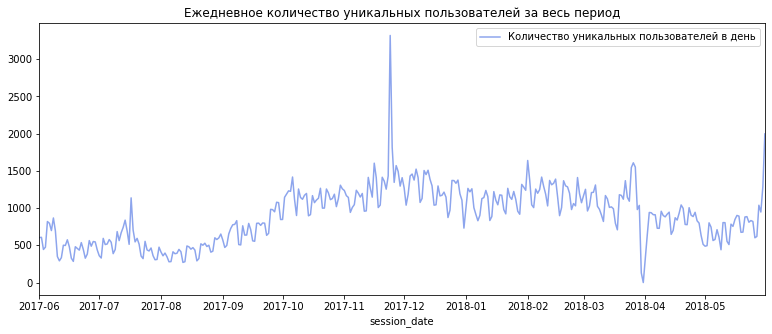

In [28]:
dau.plot(x='session_date', y = 'dau', kind='line', title = 'Ежедневное количество уникальных пользователей за весь период',
                 color='royalblue', figsize=(13,5), alpha=0.6, label='Количество уникальных пользователей в день' )
plt.show()


In [29]:
print('Среднее значение DAU за период', int(dau_mean))

Среднее значение DAU за период 907


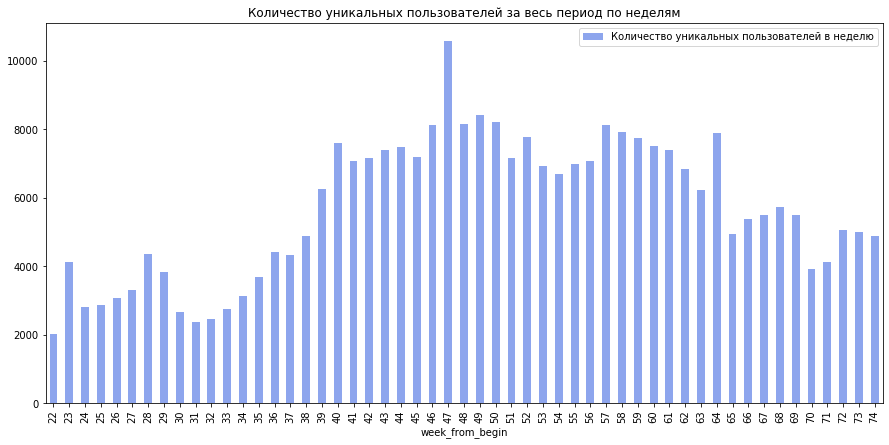

In [30]:
wau.plot(x=('week_from_begin'), y = 'wau', kind='bar', title = 'Количество уникальных пользователей за весь период по неделям',
                 color='royalblue', figsize=(15,7), alpha=0.6, label='Количество уникальных пользователей в неделю' )
plt.show()


In [31]:
print('Среднее значение WAU за период', int(wau_mean))

Среднее значение WAU за период 5716


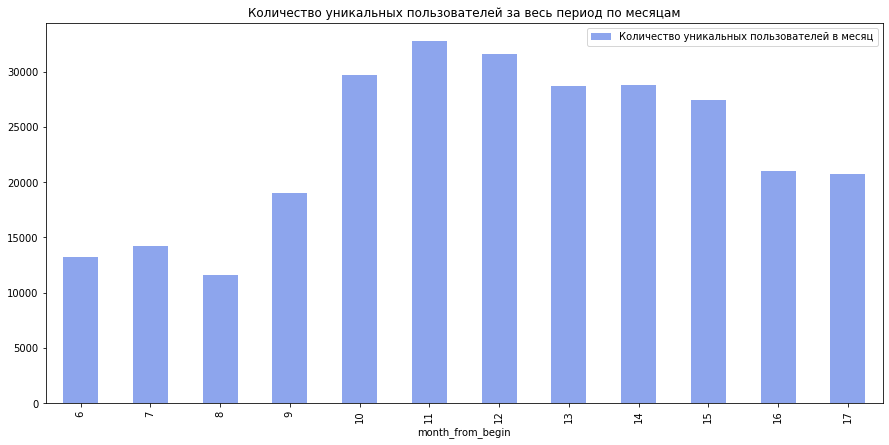

In [32]:
mau.plot(x=('month_from_begin'), y = 'mau', kind='bar', title = 'Количество уникальных пользователей за весь период по месяцам',
                 color='royalblue', figsize=(15,7), alpha=0.6, label='Количество уникальных пользователей в месяц' )
plt.show()


In [33]:
print('Среднее значение MAU за период', int(mau_mean))

Среднее значение MAU за период 23228


#### Вывод. 
На графике ежедневного изменения пользовательской активности видно пик роста в конце ноября 2017 и спад в конце марта-начале апреля 2018. Рост количества активных пользователей в ноябре 2017 подтверждают графики пользовательской активности по неделям и месяцам, а вот спад активности, согласно еженедельным и ежемесячны расчетам приходится на август 2017 года, что более логично (конец лета, все в отпусках, эстрадный и театральный сезон еще не начался).

#### Количество и продолжительность пользовательских сессий.

In [95]:
session_per_user_date = visits_log.groupby('session_date').agg({'uid': ['count', 'nunique']}).reset_index()
session_per_user_date.columns = ['session_date', 'sessions_num', 'users_num']
session_per_user_date['session_per_user_date'] = session_per_user_date['sessions_num'] / session_per_user_date['users_num']
display(session_per_user_date)

,session_date,sessions_num,users_num,session_per_user_date
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


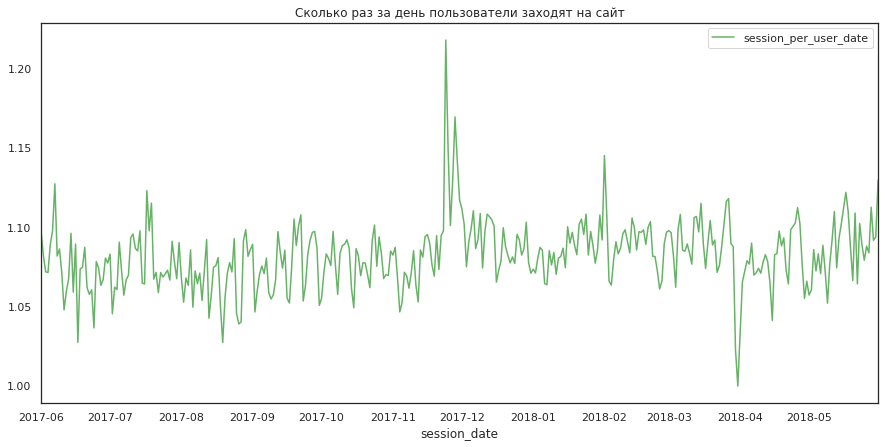

In [96]:
session_per_user_date.plot(x='session_date', y = 'session_per_user_date', kind='line',
                           title = 'Сколько раз за день пользователи заходят на сайт',
                 color='green', figsize=(15,7), alpha=0.6)
plt.show()

В среднем уникальный пользователь заходит на сайт один раз в день.

<div class="alert alert-success">
<b>Комментарий ревьюера: </b> Все верно. </div>

643.506488592098


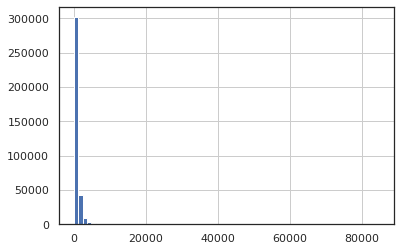

Средняя продолжительность сессии 300.0


In [97]:
visits_log['session_duration_sec'] = (visits_log['end ts'] - visits_log['start ts']).dt.seconds
print(visits_log['session_duration_sec'].mean())
visits_log['session_duration_sec'].hist(bins=70) 
plt.show()
asl = visits_log['session_duration_sec'].median()
print('Средняя продолжительность сессии', asl)

In [98]:
visits_log_dur_dev = visits_log.groupby('device')['session_duration_sec'].mean().reset_index()
print(visits_log_dur_dev)

    device  session_duration_sec
0  desktop            703.946977
1    touch            479.619407


Средняя продолжительность по всем пользовательским сессиям за период составляет около 10 минут (643 секунды), но распределение далеко от нормального, и среднее (mean) в данном случае использовать некорректно. 

На гистограмме пик слева с коротким хвостом, на основании этого определяю среднюю продолжительность пользовательской сессии как медиану, таким образом показатель ASL составляет 300 секунд - всего пять минут.

При этом в среднем продолжительность сессии с компьютера в полтора раза длиннее, чем с мобильного устройства, возможно короткие пользовательские сессии  - следствие некорректной работы сайта на мобильных устройствах.

#### Вывод.
Одной минуты мало, чтобы подобрать культурную программу или купить билеты. Возможно не со всех устройств сайт отображается корректно.

#### Retention Rate

In [99]:
first_visit_date = visits_log.groupby('uid')['start ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits_log.join(first_visit_date, on='uid')
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['start ts'].astype('datetime64[M]')


Когорты буду объединять по месяцу первого визита на сайт.

Выбрала дату первого визита каждого пользователя на сайт. В отдельные графы выделила месяц первого визита и месяц визита.

In [100]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

В отдельной графе посчитала время жизни когорты.

In [101]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
display(cohorts)

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


Посчитала количество активных пользователей в определенный месяц жизни каждой когорты.

In [102]:
initial_user_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_user_count = initial_user_count.rename(columns={'uid':'coh_users'})
cohorts = cohorts.merge(initial_user_count,on='first_visit_month') 
display(cohorts.head())

,first_visit_month,cohort_lifetime,uid,coh_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Добавила в таблицу данные о первоначальном количестве пользователей в каждой когорте.

In [103]:
cohorts['retention'] = cohorts['uid'] / cohorts['coh_users']
display(cohorts.head())

,first_visit_month,cohort_lifetime,uid,coh_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


В отдельном столбце посчитала Retention Rate по каждому месяцу жизни когорты.

In [104]:
retention_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime',
                                      values='retention', aggfunc='sum')

display(retention_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


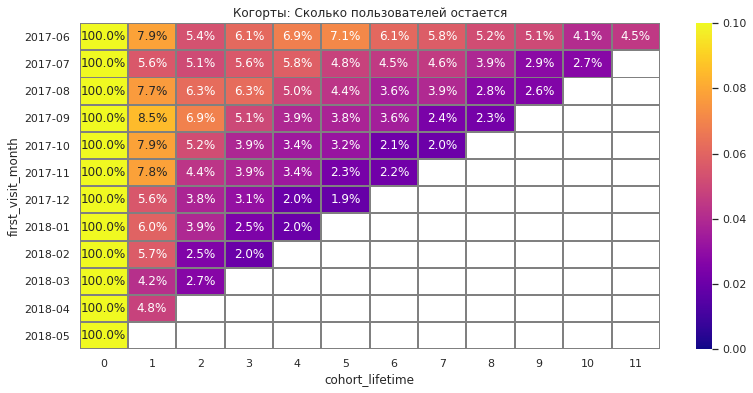

Средний Retention Rate на второй месяц жизни когорт составляет 6.52%


In [105]:
sns.set(style='white')
plt.figure(figsize=(13, 6))
plt.title('Когорты: Сколько пользователей остается')
plt.xlabel = 'Месяц жизни когорты'
plt.ylabel = 'Когорта'
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', 
            yticklabels=retention_pivot.index.strftime('%Y-%m'), vmin=0, vmax=0.1, cmap='plasma')
plt.show()

print('Средний Retention Rate на второй месяц жизни когорт составляет', '{:.2%}'.format(retention_pivot[1].mean()))

#### Вывод.
Самые высокие показатели коэффициента удержания в рассматриваемом периде - у когорты июня 2017, к концу первого года жизни у данной когорты Retention Rate составляет 4.5%, при том, что у всех остальных когорт RR к концу рассматриваемового периода состаавляет 2-3%.

Средний Retention Rate за первый месяц жизни когорт составляет 6.52%.

### Метрики электронной коммерции

#### Когда начинают покупать?

In [106]:
first_order_date = orders_log.groupby('uid')['buy ts'].min()
first_order_date.name = 'first_order_date'
orders = orders_log.join(first_order_date, on='uid')
print(orders.info())
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
buy ts              50415 non-null datetime64[ns]
revenue             50415 non-null float64
uid                 50415 non-null uint64
first_order_date    50415 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 1.5 MB
None


,buy ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


Нашла дату первой покупки

In [107]:
orders = orders.merge(first_visit_date, on='uid', how='left')
orders['period_before_buy'] = orders['first_order_date'] - orders['first_visit_date']
orders['period_before_buy'] = orders['period_before_buy'] / np.timedelta64(1, 'D')

display(orders.head())

,buy ts,revenue,uid,first_order_date,first_visit_date,period_before_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0.000694
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0.007639
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0.001389
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0.010417
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0.018750


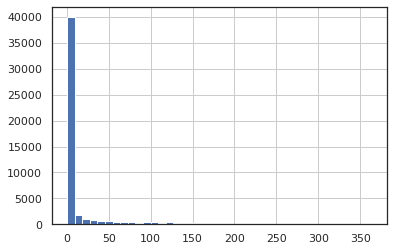

            revenue           uid  period_before_buy
count  50415.000000  5.041500e+04       50415.000000
mean       4.999647  9.098161e+18          17.617355
std       21.818359  5.285742e+18          46.465835
min        0.000000  3.135781e+14           0.000000
25%        1.220000  4.533567e+18           0.002778
50%        2.500000  9.102274e+18           0.015278
75%        4.890000  1.368290e+19           4.327083
max     2633.280000  1.844617e+19         363.294444


In [108]:
orders['period_before_buy'].hist(bins=40)
plt.show()
print(orders.describe())

#### Вывод.
Большая часть посетителей (больше 50%) становится покупателями в первый день посещения сайта, еще 25% становятся покупателями в течении пяти дней после первого визита на сайт. 

Медиана периода между первым заходом на сайт и первой покупкой составляет 22 минуты, это больше среднего времени, проводимого пользователями на сайте.

Но есть посетители, которые совершают первую покупку и через три-четыре месяца после первого визита на сайт, и почти через год, из-за чего средний период междй первым визитом и первой покупкой составляет 17 дней.

#### Как часто покупают за период?

In [109]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
cohorts_order = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'count'}).reset_index()
cohorts_order.columns = ['first_order_month', 'order_month', 'orders_count']

cohorts_order['cohort_lifetime'] = cohorts_order['order_month'] - cohorts_order['first_order_month']
cohorts_order['cohort_lifetime'] = cohorts_order['cohort_lifetime'] / np.timedelta64(1, 'M')
cohorts_order['cohort_lifetime'] = cohorts_order['cohort_lifetime'].round().astype(int)
display(cohorts_order)

,first_order_month,order_month,orders_count,cohort_lifetime
0,2017-06-01,2017-06-01,2354,0
1,2017-06-01,2017-07-01,177,1
2,2017-06-01,2017-08-01,174,2
3,2017-06-01,2017-09-01,226,3
4,2017-06-01,2017-10-01,292,4
...,...,...,...,...
74,2018-03-01,2018-05-01,176,2
75,2018-04-01,2018-04-01,2495,0
76,2018-04-01,2018-05-01,195,1
77,2018-05-01,2018-05-01,3249,0


Посчитала месяц первой покупки для каждого покупателя, посчитала количество покупок совершенных в каждом месяце. Определила срок жизни когорты.

In [110]:
first_order_date = first_order_date.reset_index()
first_order_date.columns = ['uid', 'first_order_date']

In [111]:
first_order_date['first_order_month'] = first_order_date['first_order_date'].astype('datetime64[M]')
cohort_sizes = (first_order_date.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes.head()) 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Посчитала размер каждой когорты (количество уникальных первых покупателей для каждого месяца).

In [112]:
cohorts_order_buyers = cohorts_order.merge(cohort_sizes, on='first_order_month')
cohorts_order_buyers['buyers_rate'] = cohorts_order_buyers['orders_count'] / cohorts_order_buyers['n_buyers']
display(cohorts_order_buyers.head())

,first_order_month,order_month,orders_count,cohort_lifetime,n_buyers,buyers_rate
0,2017-06-01,2017-06-01,2354,0,2023,1.163618
1,2017-06-01,2017-07-01,177,1,2023,0.087494
2,2017-06-01,2017-08-01,174,2,2023,0.086011
3,2017-06-01,2017-09-01,226,3,2023,0.111715
4,2017-06-01,2017-10-01,292,4,2023,0.144340


Посчитала сколько раз в месяц совершает покупки один покупатель из каждой когорты.

In [115]:
pivot_buyers = cohorts_order_buyers.pivot_table(index='first_order_month',
                                                 columns='cohort_lifetime',
                                                 values='buyers_rate',
                                                 aggfunc='mean')
display(pivot_buyers)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,0.087494,0.086011,0.111715,0.144340,0.107761,0.136431,0.086011,0.104795,0.075630,0.047454,0.042511
2017-07-01,1.136765,0.052002,0.062402,0.054082,0.037441,0.042642,0.031721,0.026001,0.030161,0.012480,0.027561,NaN
2017-08-01,1.118978,0.078832,0.072993,0.059124,0.062044,0.045255,0.035766,0.056934,0.033577,0.033577,NaN,NaN
2017-09-01,1.136381,0.084851,0.062379,0.063541,0.025959,0.042232,0.041844,0.021697,0.023634,NaN,NaN,NaN
2017-10-01,1.143779,0.072350,0.037327,0.028111,0.029724,0.023733,0.019816,0.028802,NaN,NaN,NaN,NaN
2017-11-01,1.179368,0.097280,0.044597,0.051703,0.033325,0.014457,0.024994,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,0.061602,0.046087,0.040840,0.019621,0.023956,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,0.066410,0.047139,0.018974,0.023125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,0.060805,0.022733,0.019173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В среднем наибольшее количество покупок совершается покупателем в первый месяц, дальше показатели снижаются, покупать начинают реже, не зависимо от первого месяца совершения покупки. 

In [116]:
pivot_buyers_month = pivot_buyers.cumsum(axis=1).mean(axis = 0)[5]
display(pivot_buyers_month)

1.4341911542792218

#### Вывод.
За первые полгода жизни когорты каждый покупатель совершает в среднем чуть больше одной покупки в месяц (видимо самый интересный концерт или спектакль).

#### Средний чек.

In [117]:
orders['order_date'] = orders['buy ts'].astype('datetime64[D]')
orders_bills = orders.groupby('order_date').agg({'revenue':['sum', 'count']}).reset_index()
orders_bills.columns=['order_date', 'sum', 'count']
display(orders_bills.head())

,order_date,sum,count
0,2017-06-01,389.46,96
1,2017-06-02,324.11,111
2,2017-06-03,166.48,67
3,2017-06-04,195.21,66
4,2017-06-05,441.49,161


In [118]:
orders_bills['bill'] = orders_bills['sum'] / orders_bills['count']
display(orders_bills.head())

,order_date,sum,count,bill
0,2017-06-01,389.46,96,4.056875
1,2017-06-02,324.11,111,2.919910
2,2017-06-03,166.48,67,2.484776
3,2017-06-04,195.21,66,2.957727
4,2017-06-05,441.49,161,2.742174


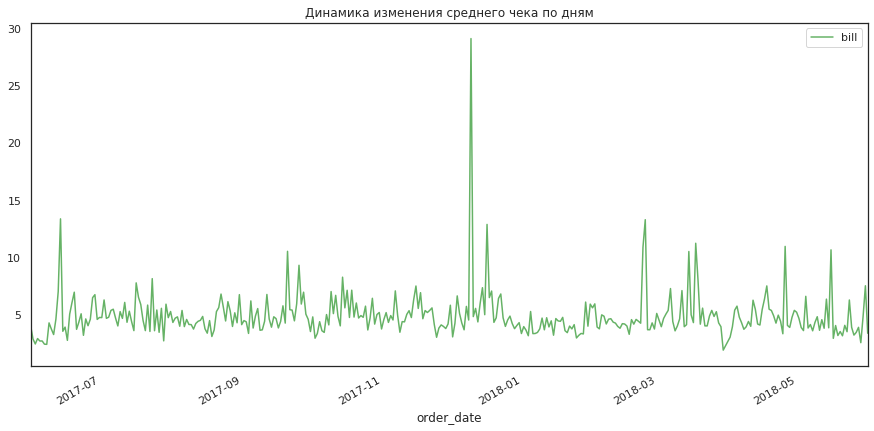

Средний чек за период наблюдений 4.936187581946566


In [119]:
orders_bills.plot(x='order_date', y = 'bill', kind='line', title = 'Динамика изменения среднего чека по дням',
                 color='green', figsize=(15,7), alpha=0.6)
plt.show()
print('Средний чек за период наблюдений', orders_bills['bill'].mean())

#### Вывод.
Средний чек за весь период наблюдений составляет 4.93 у.е. Пик роста среднего чека приходится на декабрь 2017, спад  - на конец марта, самое начало апреля 2018 года, что коррелирует с графиком пользовательской активности на сайте.

Перед новым годом должна быть высокая активность по покупке билетов на елки, праздничные шоу, что может объяснить рост клиентских расходов.

После 8 марта заканчиваются концерты, шоу, других развлекательных мероприятий, приуроченных к февральским-мартовским гендерным праздникам,  становится меньше, люди отдыхают от культурных развлечений.

#### Ценность одного покупателя.

In [56]:
cohorts_ = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts_['cohort_lifetime'] = cohorts_['order_month'] - cohorts_['first_order_month']
cohorts_['cohort_lifetime'] = cohorts_['cohort_lifetime'] / np.timedelta64(1, 'M')
cohorts_['cohort_lifetime'] = cohorts_['cohort_lifetime'].round().astype(int)
display(cohorts_)

,first_order_month,order_month,revenue,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,0
1,2017-06-01,2017-07-01,981.82,1
2,2017-06-01,2017-08-01,885.34,2
3,2017-06-01,2017-09-01,1931.30,3
4,2017-06-01,2017-10-01,2068.58,4
...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,2
75,2018-04-01,2018-04-01,10600.69,0
76,2018-04-01,2018-05-01,1209.92,1
77,2018-05-01,2018-05-01,13925.76,0


Посчитала сумму покупок совершенных в каждом месяце. Определила срок жизни когорты.

In [57]:
report = cohorts_.merge(cohort_sizes, on='first_order_month')
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report['ltv'] = report['gp'] / report['n_buyers']

display(report.head())

,first_order_month,order_month,revenue,cohort_lifetime,n_buyers,gp,ltv
0,2017-06-01,2017-06-01,9557.49,0,2023,9557.49,4.724414
1,2017-06-01,2017-07-01,981.82,1,2023,981.82,0.485329
2,2017-06-01,2017-08-01,885.34,2,2023,885.34,0.437637
3,2017-06-01,2017-09-01,1931.30,3,2023,1931.30,0.954671
4,2017-06-01,2017-10-01,2068.58,4,2023,2068.58,1.022531


Добавила в таблицу информацию о размере когорты, посчитала валовую прибыль и LTV за каждый месяц для каждой когорты.

Выделила в отдельную таблицу первые шесть когорт за рассматриваемый период (т.е. когорт, проживших более 6 месяцев).

In [58]:
pivot_ltv = report.pivot_table(index='first_order_month',
                                       columns='cohort_lifetime', values='ltv', aggfunc='mean').round(2)
ltv_cum = pivot_ltv.cumsum(axis=1)
report_ = ltv_cum[5].reset_index()
report_.columns = ['first_order_month', 'ltv_mean']
display(ltv_cum)
display(report_)
print('Средний LTV для рассматриваемого периода составляет', 
      report_.mean(axis=0), 'у.е.')
print('Средний LTV для первых шести когорт рассматриваемого периода составляет', 
      report_.loc['0':'5'].mean(axis=0), 'у.е.')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,first_order_month,ltv_mean
0,2017-06-01,8.36
1,2017-07-01,7.67
2,2017-08-01,7.37
3,2017-09-01,12.31
4,2017-10-01,6.16
5,2017-11-01,6.27
6,2017-12-01,7.65
7,2018-01-01,NaN
8,2018-02-01,NaN
9,2018-03-01,NaN


Средний LTV для рассматриваемого периода составляет ltv_mean    7.97
dtype: float64 у.е.
Средний LTV для первых шести когорт рассматриваемого периода составляет ltv_mean    8.023333
dtype: float64 у.е.


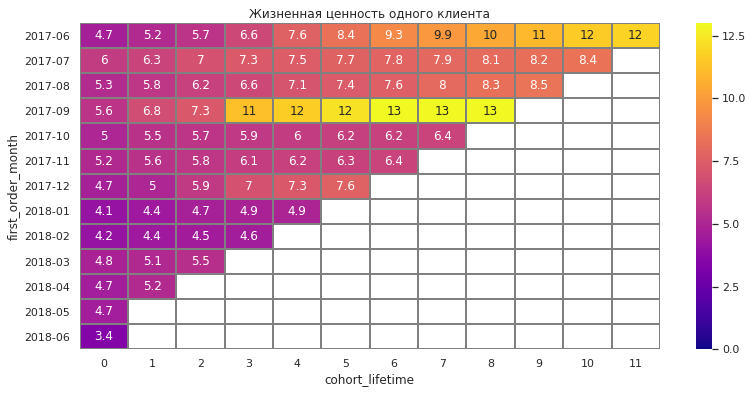

In [60]:
sns.set(style='white')
plt.figure(figsize=(13, 6))
plt.title('Жизненная ценность одного клиента')
plt.xlabel = 'Когорта'
plt.ylabel = 'Месяц жизни когорты'
sns.heatmap(ltv_cum, annot=True, linewidths=1,
            yticklabels=pivot_ltv.index.strftime('%Y-%m'),  vmin=0, vmax=13,
            linecolor='gray', cmap='plasma')
plt.show()

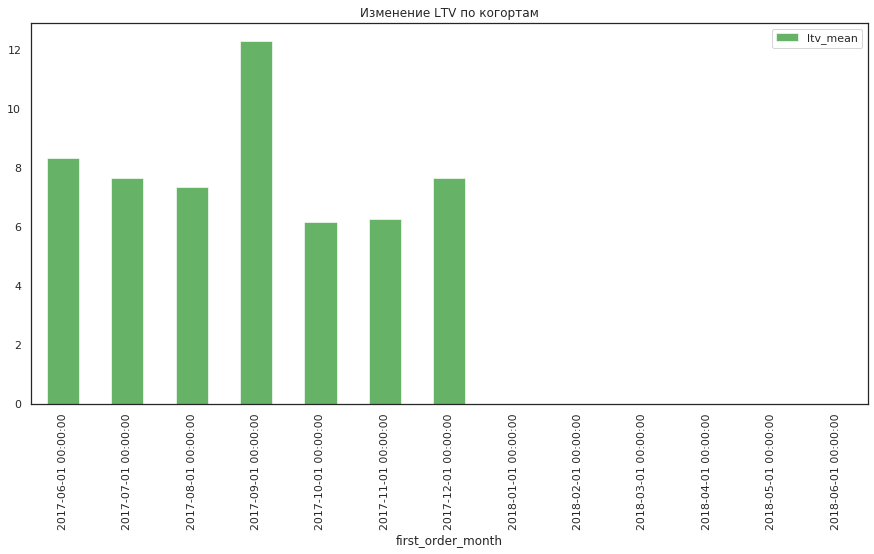

In [61]:
report_.plot(x='first_order_month', y='ltv_mean', kind='bar',
             title = 'Изменение LTV по когортам', color='green', figsize=(15,7), alpha=0.6)
plt.show()

#### Вывод.
Наибольшую ценность покупатели приносят компании в первый месяц жизни (месяц с наибольшим количеством покупок на одного клиента), дальше показатель LTV снижается.
Из рассматриваемых шести когорт самая прибыльная для компании  - когорта сенятбря 2017 года, принесшая по 12 у.е. на одного покупателя. Возможно в этот период была рекламная кампания, или такой рост связан с началом нового культурного сезона: открытием театров, выставок после летних каникул. 

### Маркетинговые метрики.

#### Расходы на маркетинг.

In [62]:
costs['month'] = costs['dt'].astype('datetime64[M]') 
monthly_costs = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
#print(monthly_costs.info())
display(monthly_costs.head(10))

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
5,2017-06-01,9,285.22
6,2017-06-01,10,314.22
7,2017-07-01,1,1072.88
8,2017-07-01,2,2333.11
9,2017-07-01,3,7674.37


В отдельной колонке вывела месяц возникновения затрат.

Сгруппировала расходы по рекламному источнику и месяцу возникновения затрат.

In [63]:
costs_source = monthly_costs.groupby('source_id')['costs'].sum().reset_index().sort_values(by='costs', ascending=False)
display(costs_source)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


Посчитала расходы по каждому рекламному источнику.

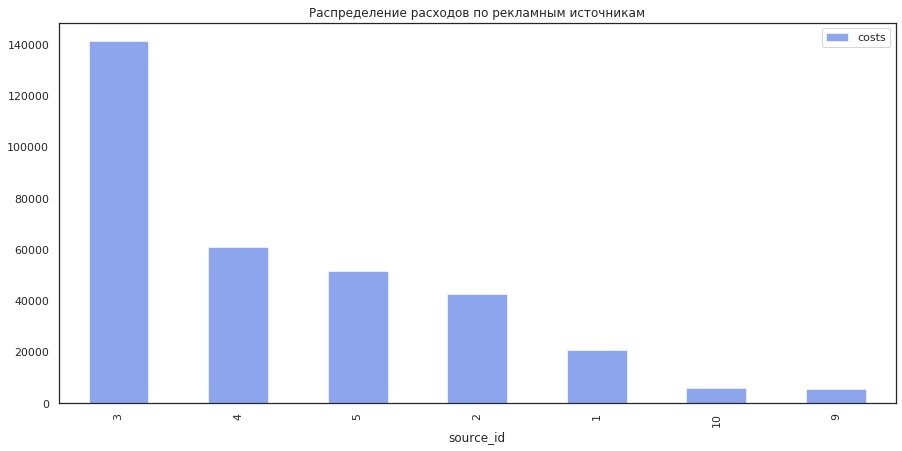

       source_id          costs
count   7.000000       7.000000
mean    4.857143   47018.802857
std     3.436499   46967.961870
min     1.000000    5517.490000
25%     2.500000   13327.880000
50%     4.000000   42806.040000
75%     7.000000   56415.350000
max    10.000000  141321.630000


In [64]:
costs_source.plot(x='source_id', y = 'costs', kind='bar', title = 'Распределение расходов по рекламным источникам',
                 color='royalblue', figsize=(15,7), alpha=0.6)
plt.show()
print(costs_source.describe())

In [65]:
monthly_costs_source = monthly_costs.groupby('month')['costs'].sum().reset_index()

display(monthly_costs_source.head(10))


,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


 Посчитала общие расходы за каждый месяц.

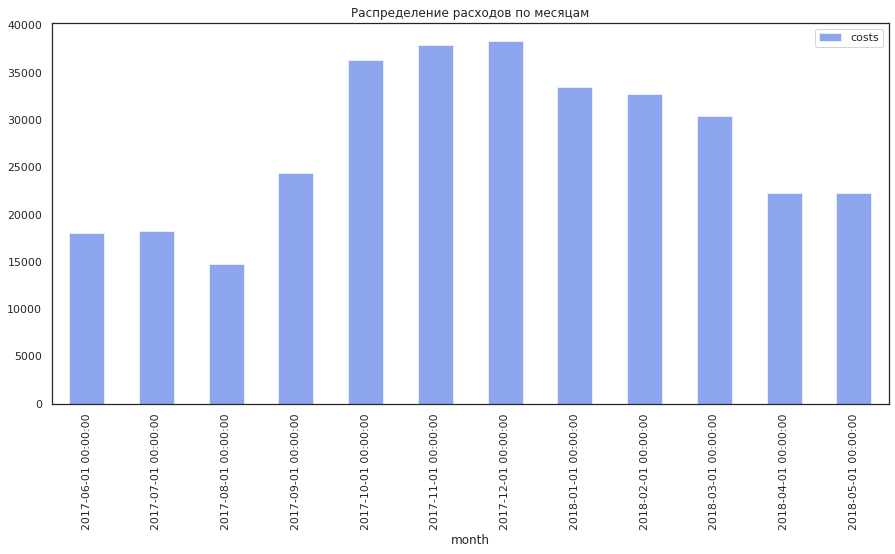

              costs
count     12.000000
mean   27427.635000
std     8405.071207
min    14790.540000
25%    21228.350000
50%    27392.090000
75%    34219.610000
max    38315.350000


In [66]:
monthly_costs_source.plot(x='month', y = 'costs', kind='bar', figsize=(15, 7),
                 color='royalblue', alpha=0.6, title = 'Распределение расходов по месяцам')
plt.show()
print(monthly_costs_source.describe())

Посчитала расходы по месяцам и рекламным источникам.

Наибольшие маркетинговые расходы были у компании в октябре-декабре 2017 года 36-38 тысяч у.е. в месяц. Затем январь - март, расходы составляли 30-33 тысячи.

С октября начинаются рекламы новогодних шоу, и развлечений на время длинных январских выходных. В январе-начале марта идет реклама концертов и мероприятий связанные с гендерными праздниками.

По отдельным источникам - наибольшие расходы за рассматриваемый период у источника 3 - 141 тысяча, минимальные у источника 10 - 5 тысяч.

In [67]:
monthly_costs_pivot = monthly_costs.pivot_table(index='source_id', columns='month',
                                                values='costs', aggfunc='sum')
display(monthly_costs_pivot)

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


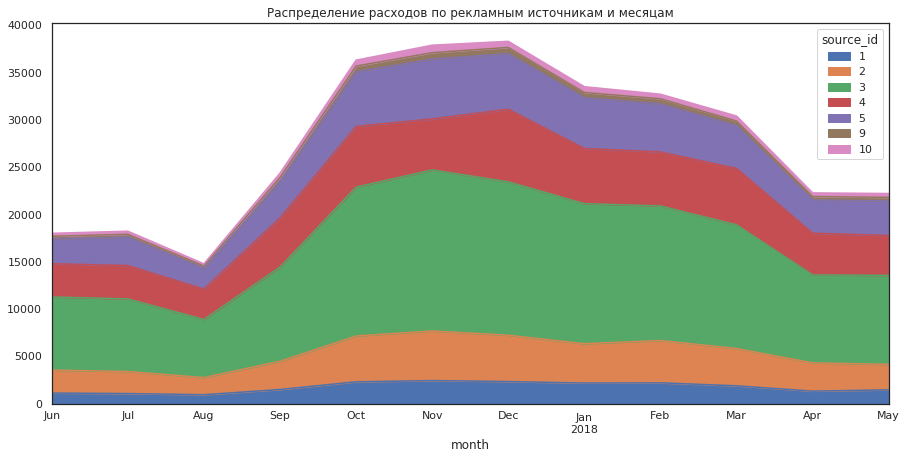

In [68]:
monthly_costs.pivot_table(index = 'month', columns = 'source_id', 
                          values = 'costs', aggfunc = 'sum').plot(kind = 'area', figsize = (15,7), 
                            title='Распределение расходов по рекламным источникам и месяцам')
plt.show()

#### Вывод.
В течение всего исследуемого периода по всем рекламным источникам затраты в период с октября 2017 по март 2018 росли, начиная с апреля 2018 расходы по всем рекламным источникам снижаются до уровня августа-сентября 2017 года.

#### Экономика одного покупателя

##### Общая сумма расходов на привлечение одного клиента.

In [70]:
uid_counts = orders.groupby('order_month')['uid'].nunique().reset_index()
uid_counts.columns = ['order_month', 'uid_count']
display(uid_counts.head())
report_costs = pd.merge(uid_counts, monthly_costs_source, left_on='order_month', right_on='month', how='left')
report_costs['cac'] = (report_costs['costs'] / report_costs['uid_count']).round(2)
display(report_costs)

,order_month,uid_count
0,2017-06-01,2023
1,2017-07-01,1984
2,2017-08-01,1472
3,2017-09-01,2750
4,2017-10-01,4675


,order_month,uid_count,month,costs,cac
0,2017-06-01,2023,2017-06-01,18015.00,8.91
1,2017-07-01,1984,2017-07-01,18240.59,9.19
2,2017-08-01,1472,2017-08-01,14790.54,10.05
3,2017-09-01,2750,2017-09-01,24368.91,8.86
4,2017-10-01,4675,2017-10-01,36322.88,7.77
5,2017-11-01,4547,2017-11-01,37907.88,8.34
6,2017-12-01,4942,2017-12-01,38315.35,7.75
7,2018-01-01,3898,2018-01-01,33518.52,8.60
8,2018-02-01,4258,2018-02-01,32723.03,7.69
9,2018-03-01,4181,2018-03-01,30415.27,7.27


Посчитала количество уникальных пользователей по месяцам и расходы на привлечение одного клиента по месяцам.

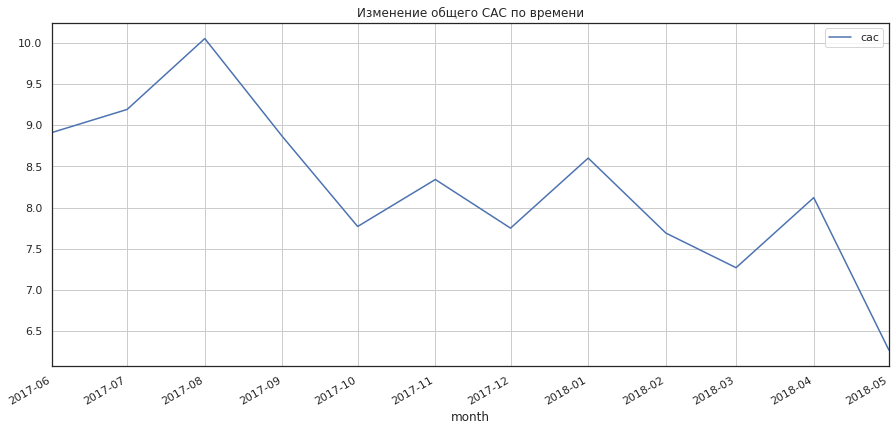

In [71]:
report_costs.plot(kind = 'line', x='month', y='cac', figsize = (15,7), grid=True, title='Изменение общего CAC по времени')

plt.show()

Самые высокий общий расход на привлечение одного клиента был в августе 2017 - 10 у.е., самый низкий в мае 2018 - 6.27 у.е. С октября 2017 показатель CAC снизился по сравнению с предыдущими месяцами рассматриваемого периода, видимо высокие расходы начиная с предновогоднего сезона позволили привлечь большое число клиентов.

##### Расходы на привлечение одного клиента по рекламным источникам.

In [75]:
display(visits.head())

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,first_visit_date,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


Связь пользователя с рекламным источником есть только в таблице visits.

In [76]:
print(visits['source id'].unique())
print(costs['source_id'].unique())

[ 4  2  5  9  3  1 10  7  6]
[ 1  2  3  4  5  9 10]


In [77]:
first_source_id = visits[visits['start ts'] == visits['first_visit_date']]
first_source_id = first_source_id.loc[:, ['uid', 'source id']]

Определила для каждого пользователя рекламный источник, как источник первого визита на сайт (источник, с которого был заход в первую сессию).

In [78]:
orders_source = orders.merge(first_source_id, on='uid', how='left')
#orders_source = orders_source.drop('index', 1)
display(orders_source.head())

,buy ts,revenue,uid,first_order_date,first_visit_date,period_before_buy,first_order_month,order_month,order_date,source id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0.000694,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0.007639,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0.001389,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0.010417,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0.018750,2017-06-01,2017-06-01,2017-06-01,3


Объединила таблицу заказов с источником первого визита на сайт.

In [79]:
buyers_month_source = orders_source.groupby(['order_month', 'source id'])['uid'].nunique().reset_index()
buyers_month_source.columns = ['order_month', 'source id', 'buyers']
display(buyers_month_source.head())

,order_month,source id,buyers
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


Посчитала количество уникальных покупателей для каждого источника за каждый месяц.

In [80]:
costs_month_source = pd.merge(monthly_costs, buyers_month_source, left_on=('source_id', 'month'),
                              right_on=('source id', 'order_month'))
costs_month_source = costs_month_source.drop('source id', 1)
costs_month_source['cac'] = costs_month_source['costs'] / costs_month_source['buyers']
#cac_monthly = orders_source.groupby(['month', 'source id']).agg({'uid':'count', 'costs':'sum'}).reset_index()
display(costs_month_source.head(12))

,month,source_id,costs,order_month,buyers,cac
0,2017-06-01,1,1125.61,2017-06-01,190,5.924263
1,2017-06-01,2,2427.38,2017-06-01,235,10.329277
2,2017-06-01,3,7731.65,2017-06-01,638,12.118574
3,2017-06-01,4,3514.80,2017-06-01,413,8.510412
4,2017-06-01,5,2616.12,2017-06-01,384,6.812813
5,2017-06-01,9,285.22,2017-06-01,68,4.194412
6,2017-06-01,10,314.22,2017-06-01,95,3.307579
7,2017-07-01,1,1072.88,2017-07-01,176,6.095909
8,2017-07-01,2,2333.11,2017-07-01,216,10.801435
9,2017-07-01,3,7674.37,2017-07-01,525,14.617848


Объединила данные о ежемесячных расходах в разрезе источников с количеством уникальных покупателей для каждого источника за каждый месяц, посчитала CAC по месяцам в разрезе источников.

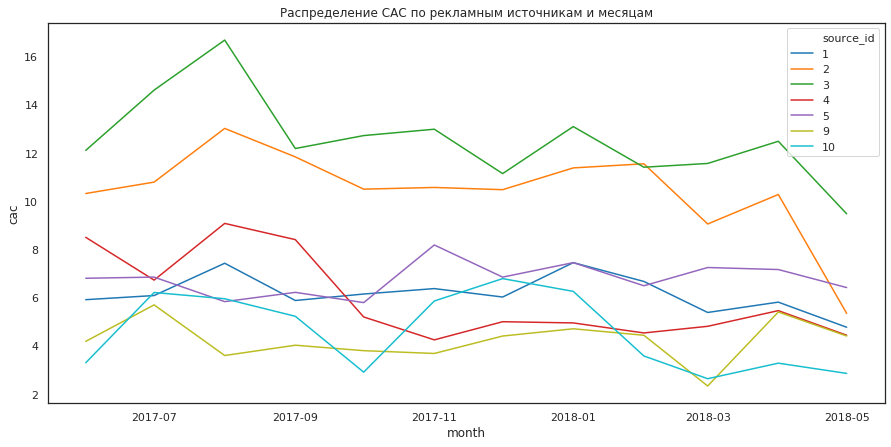

In [82]:
plt.figure(figsize=(15,7))
sns.lineplot(x='month', y='cac', hue='source_id', data = costs_month_source, palette='tab10', legend='full')
plt.title('Распределение CAC по рекламным источникам и месяцам')
plt.show()

Самые высокие расходы на привлечение одного клиента в разрезе рекламных источников у источника 3, самые низкие у источника 10.

##### Окупаемость расходов.

In [83]:
cohorts_source_buy = orders_source.groupby(['first_order_month','source id']).agg({'uid':'nunique'}).reset_index()
cohorts_source_buy = cohorts_source_buy.rename(columns={'uid' : 'buyers_num_source'})
display(cohorts_source_buy)

,first_order_month,source id,buyers_num_source
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


Объединила покупателей в когорты по месяцу первой покупки и рекламному источнику, посчитала количество покупателей в когорте.

In [84]:
cohort_source_rev = orders_source.groupby(['first_order_month', 'order_month', 'source id']).agg({'revenue':'sum'}).reset_index()
display(cohort_source_rev.head())

,first_order_month,order_month,source id,revenue
0,2017-06-01,2017-06-01,1,1378.70
1,2017-06-01,2017-06-01,2,1043.68
2,2017-06-01,2017-06-01,3,2804.34
3,2017-06-01,2017-06-01,4,1959.84
4,2017-06-01,2017-06-01,5,1898.89


Посчитала доход по в разрезе когорт, месяца покупки и рекламному источнику.

In [85]:
cohort_source_pivot = cohorts_source_buy.merge(cohort_source_rev, on=('first_order_month', 'source id'))
display(cohort_source_pivot)

,first_order_month,source id,buyers_num_source,order_month,revenue
0,2017-06-01,1,190,2017-06-01,1378.70
1,2017-06-01,1,190,2017-07-01,414.98
2,2017-06-01,1,190,2017-08-01,419.43
3,2017-06-01,1,190,2017-09-01,714.24
4,2017-06-01,1,190,2017-10-01,811.20
...,...,...,...,...,...
511,2018-05-01,4,804,2018-05-01,3802.91
512,2018-05-01,5,497,2018-05-01,2094.04
513,2018-05-01,9,60,2018-05-01,223.05
514,2018-05-01,10,130,2018-05-01,470.89


Собрала в одной таблице всю информацию по когортам покупок.

In [86]:
cohort_source_total =  pd.merge(cohort_source_pivot, monthly_costs, left_on=('source id', 'order_month'), right_on=('source_id', 'month'))
cohort_source_total = cohort_source_total.drop('source id', 1)
display(cohort_source_total)                                        

,first_order_month,buyers_num_source,order_month,revenue,month,source_id,costs
0,2017-06-01,190,2017-06-01,1378.70,2017-06-01,1,1125.61
1,2017-06-01,190,2017-07-01,414.98,2017-07-01,1,1072.88
2,2017-07-01,160,2017-07-01,1166.70,2017-07-01,1,1072.88
3,2017-06-01,190,2017-08-01,419.43,2017-08-01,1,951.81
4,2017-07-01,160,2017-08-01,175.31,2017-08-01,1,951.81
...,...,...,...,...,...,...,...
509,2017-10-01,209,2018-04-01,4.16,2018-04-01,10,388.25
510,2017-11-01,128,2018-04-01,6.36,2018-04-01,10,388.25
511,2018-02-01,123,2018-04-01,0.49,2018-04-01,10,388.25
512,2018-03-01,186,2018-04-01,12.71,2018-04-01,10,388.25


Объединила данные по покупкам и расходам с разрезе источников и месяцев в одну таблицу.

In [87]:
cohort_source_total['lifetime'] = cohort_source_total['order_month'] - cohort_source_total['first_order_month']
cohort_source_total['lifetime'] = cohort_source_total['lifetime'] / np.timedelta64(1, 'M')
cohort_source_total['lifetime'] = cohort_source_total['lifetime'].round().astype(int)
display(cohort_source_total)  

,first_order_month,buyers_num_source,order_month,revenue,month,source_id,costs,lifetime
0,2017-06-01,190,2017-06-01,1378.70,2017-06-01,1,1125.61,0
1,2017-06-01,190,2017-07-01,414.98,2017-07-01,1,1072.88,1
2,2017-07-01,160,2017-07-01,1166.70,2017-07-01,1,1072.88,0
3,2017-06-01,190,2017-08-01,419.43,2017-08-01,1,951.81,2
4,2017-07-01,160,2017-08-01,175.31,2017-08-01,1,951.81,1
...,...,...,...,...,...,...,...,...
509,2017-10-01,209,2018-04-01,4.16,2018-04-01,10,388.25,6
510,2017-11-01,128,2018-04-01,6.36,2018-04-01,10,388.25,5
511,2018-02-01,123,2018-04-01,0.49,2018-04-01,10,388.25,2
512,2018-03-01,186,2018-04-01,12.71,2018-04-01,10,388.25,1


Добавила в таблицу месяц жизни когорты.

In [88]:
cohort_source_total['gp'] = cohort_source_total['revenue'] * margin_rate
cohort_source_total['ltv'] = cohort_source_total['gp'] / cohort_source_total['buyers_num_source']
cohort_source_total['cac'] = cohort_source_total['costs'] / cohort_source_total['buyers_num_source']
cohort_source_total['romi'] = cohort_source_total['ltv']  / cohort_source_total['cac']
display(cohort_source_total)

,first_order_month,buyers_num_source,order_month,revenue,month,source_id,costs,lifetime,gp,ltv,cac,romi
0,2017-06-01,190,2017-06-01,1378.70,2017-06-01,1,1125.61,0,1378.70,7.256316,5.924263,1.224847
1,2017-06-01,190,2017-07-01,414.98,2017-07-01,1,1072.88,1,414.98,2.184105,5.646737,0.386791
2,2017-07-01,160,2017-07-01,1166.70,2017-07-01,1,1072.88,0,1166.70,7.291875,6.705500,1.087447
3,2017-06-01,190,2017-08-01,419.43,2017-08-01,1,951.81,2,419.43,2.207526,5.009526,0.440666
4,2017-07-01,160,2017-08-01,175.31,2017-08-01,1,951.81,1,175.31,1.095687,5.948813,0.184186
...,...,...,...,...,...,...,...,...,...,...,...,...
509,2017-10-01,209,2018-04-01,4.16,2018-04-01,10,388.25,6,4.16,0.019904,1.857656,0.010715
510,2017-11-01,128,2018-04-01,6.36,2018-04-01,10,388.25,5,6.36,0.049687,3.033203,0.016381
511,2018-02-01,123,2018-04-01,0.49,2018-04-01,10,388.25,2,0.49,0.003984,3.156504,0.001262
512,2018-03-01,186,2018-04-01,12.71,2018-04-01,10,388.25,1,12.71,0.068333,2.087366,0.032737


Посчитала расходы на привлечение одного покупателя, и жизненную ценность покупателя, срок возврата инвестиций в разрезе когорт по месяцам и источникам привлечения.

Самые высокие расходы на привлечение одного клиента  - у источника 3 - 18.71 у.е., самые низкие - у источника 10 - 5.86 у.е.

In [93]:
romi_pivot = cohort_source_total.pivot_table(index='source_id', columns='lifetime',
                                            values='romi', aggfunc='mean')
romi_pivot = romi_pivot.cumsum(axis=1).round(2) 
display(romi_pivot)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.89,1.05,1.20,1.33,1.40,1.44,1.50,1.61,1.75,1.86,2.00,2.22
2,0.55,0.66,0.79,0.95,1.04,1.13,1.18,1.22,1.25,1.27,1.34,1.37
3,0.34,0.36,0.37,0.38,0.39,0.39,0.40,0.40,0.41,0.41,0.41,0.41
4,0.76,0.79,0.80,0.83,0.85,0.88,0.93,0.95,0.96,0.98,1.04,1.05
5,0.66,0.70,0.74,0.94,0.97,1.02,1.05,1.07,1.09,1.13,1.14,1.16
9,0.77,0.83,0.89,0.95,0.98,1.02,1.06,1.10,1.19,1.20,1.22,NaN
10,0.73,0.74,0.75,0.78,0.79,0.80,0.82,0.83,0.83,0.84,NaN,NaN


Расходы на привлечение одного клиента для источника 1 окупаются на второй месяц,

для источника 2 - на пятый месяц,

для источника  3 - за год не окупились,

для источника 4 - окупаются на одиннадцатый месяц,

для источников 5 и 9 - на шестой месяц,

для источника 10 за рассматриваемый период не окупились.

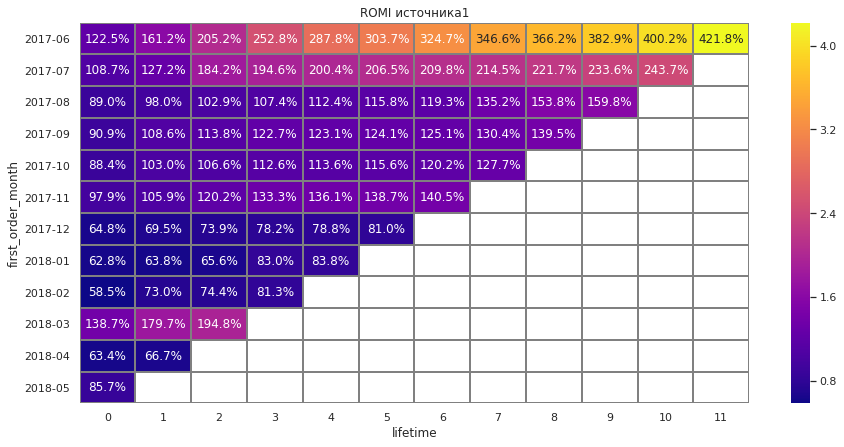

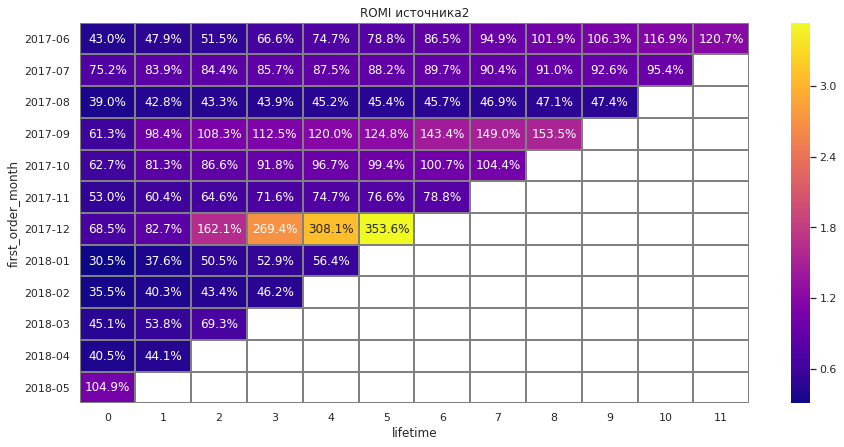

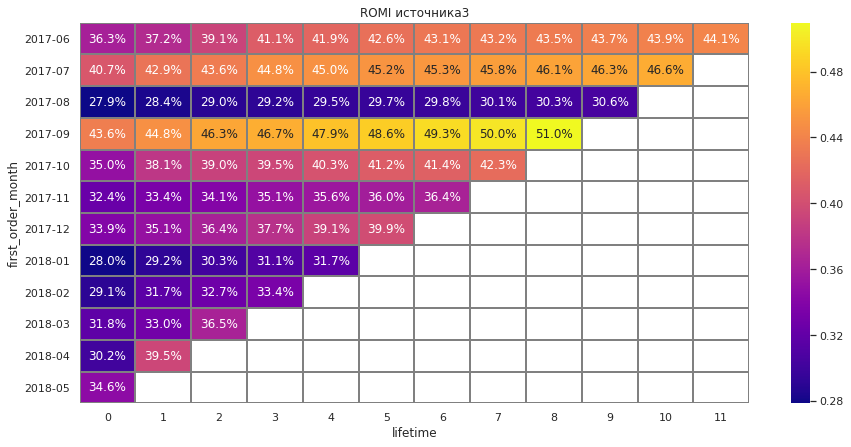

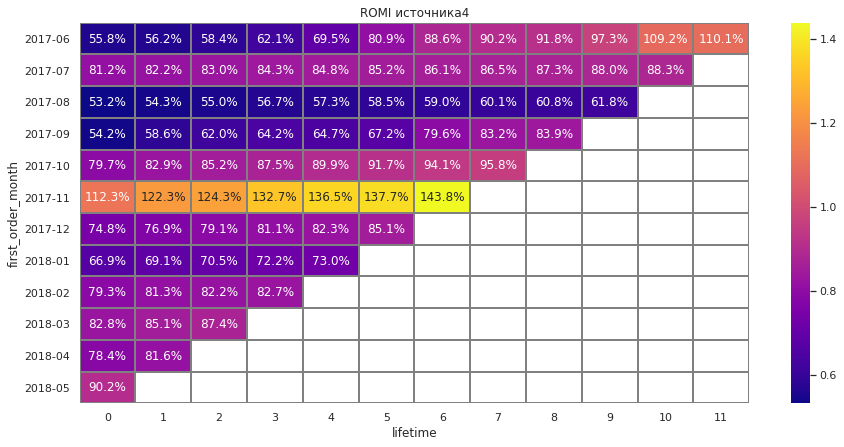

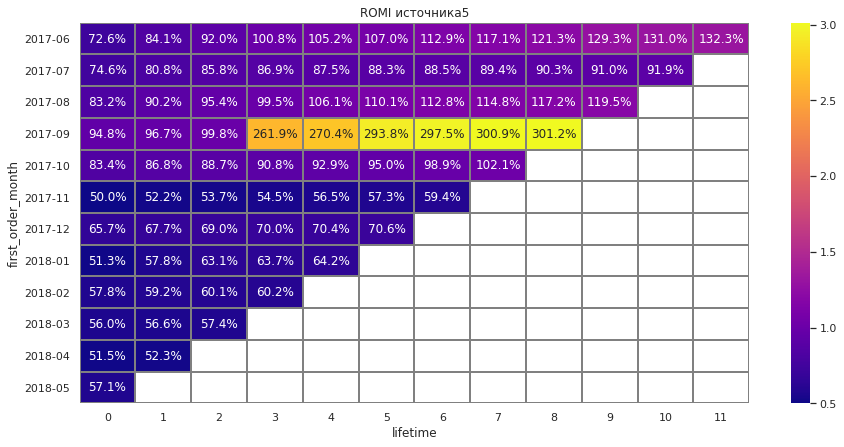

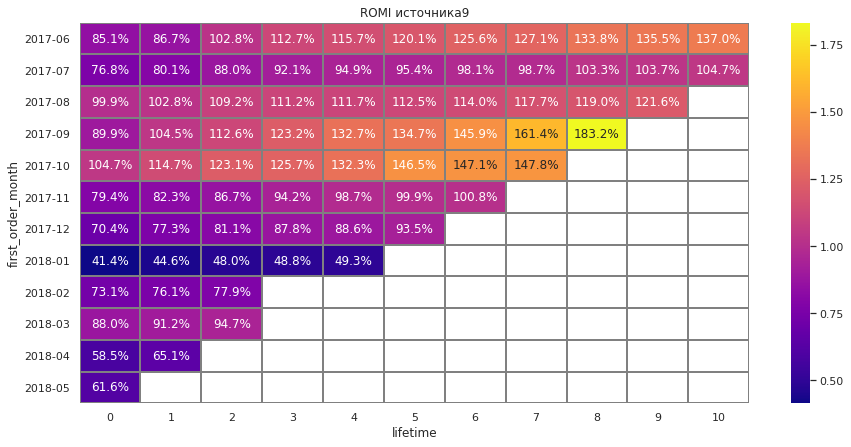

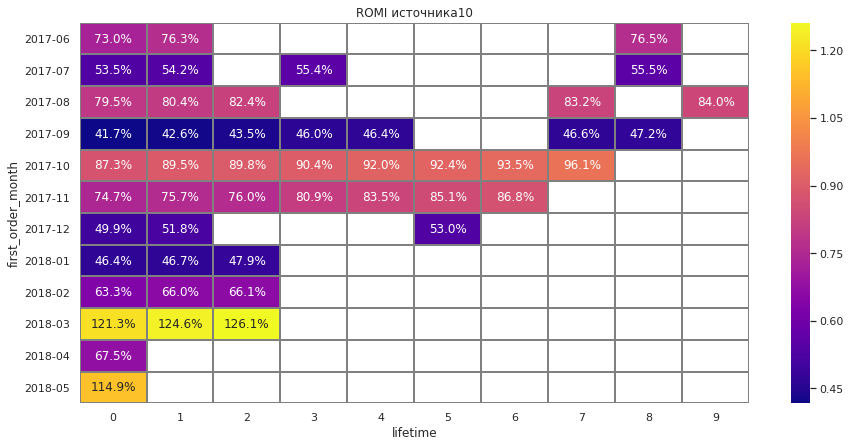

In [94]:
for source in cohort_source_total.source_id.unique():
    output = cohort_source_total.query('@source == source_id').pivot_table(
    index='first_order_month', 
    columns='lifetime', 
    values='romi', 
    aggfunc='mean').cumsum(axis=1)
    result_romi = output.mean(axis=0)
 
    plt.figure(figsize=(15, 7))
    sns.set(style='white')
    sns.heatmap(output, annot=True, fmt='.1%', linewidths=1, linecolor='gray',
                yticklabels=output.index.strftime('%Y-%m'), cmap='plasma');
    plt.title('ROMI источника' + str(source))
    plt.show()

Тепловые карты по когортам подтверждают выводы из таблицы со сводным ROMI (romi_pivot):2
расходы на привлечение в части источника 1 для первых шести когорт окупились в первый-третий месяц, когорта марта 2018 окупилась в первый месяц, остальные когорты не окупились,

расходы на привлечение в части источника 2 когорта июня 2017 окупилась на седьмой месяц, когорты сентября и декабря - на третий месяц, когорта мая 2018 - в первый месяц, остальные когорты не окупились,

расходы на привлечение в части источника 3 не окупились ни для одной из когорт,

расходы на привлечение в части источника 4 для когорты июня 2017 окупились на одиннадцатый месяц, для когорты ноября 2017 - в первый месяц, остальные когорты не окупились,

расходы на привлечение в части источника 5 когорты июня и сентября 2017 окупились на четвертый месяц, когорта августа 2018 - на пятый месяц, остальные когорты не окупились,

расходы на привлечение в части источника 9 для когорт июня 2017, августа 2017, сентября 2017, октября 2017 окупились в первый-третий месяц, для когорты июля 2017 - на девятый месяц, для когорты ноября 2017 - на седьмой месяц, когорты декабря 2017 - мая 2018 не окупились (возморжно, просто не успели),

расходы на привлечение в части источника 10 окупились только для когорт марта 2017 и мая 2017 (в первый месяц).


## Вывод.

### Источники траффика.

Анализ показал, что стоит отказаться от рекламного источника 3: у него самые высоки расходы на привлечение одного клиента (таблица cac_source_mean), которые совсем не окупаются (таблица romi_pivot).

Я бы предложила сосредоточиться на источниках 1, 5, 9, которые окупаются в первые полгода, при средних расходах на привлечение одного клиента. Источник 1 выглядел очень перспективным по итогам окупаемости первых 6 когорт, но потом окупаемость практически сошла на нет, возможно что-то изменилось в методе привлечения.

Возможно нужно увеличить расходы для источника 10 - у него самые низкие расходы (таблица costs_source), но при этом он показывает окупаемость с первого месяца для отдельных когорт, может были какие-то сопуствующие факторы, повлиявшие на окупаемость.

Также следует отметить, что у компании есть источники 6 и 7, по которым не возникает расходов, но из этих источников и нет покупок (только визиты). 

### Продуктовые метрики.

Пик пользовательской активности за рассматриваемый период приходится на конец ноября 2017, спад - на конец марта-начале апреля 2018. Рост количества активных пользователей в ноябре 2017 подтверждают графики пользовательской активности по неделям и месяцам, а вот спад активности, согласно еженедельным и ежемесячны расчетам приходится на август 2017 года, что более логично (конец лета, все в отпусках, эстрадный и театральный сезон еще не начался).

Среднюю продолжительность пользовательской сессии определила как медиану, так как распределние продолжительности сессий не совпадало с нормальным, показатель ASL составляет 300 секунд - всего пять минут.

При этом в среднем продолжительность сессии с компьютера в полтора раза длиннее, чем с мобильного устройства, возможно короткие пользовательские сессии  - следствие некорректной работы сайта на мобильных устройствах.

Самые высокие показатели коэффициента удержания в выбранном периде - у когорты июня 2017, к концу первого года жизни у данной когорты Retention Rate составляет 4.5%, при том, что у всех остальных когорт RR к концу рассматриваемового периода состаавляет 2-3%. Средний Retention Rate за первый месяц жизни когорт составляет 6.52%.

### Метрики электронной коммерции.

Большая часть посетителей (больше 50%) становится покупателями в первый день посещения сайта, еще 25% становятся покупателями в течении пяти дней после первого визита на сайт.

За первые полгода жизни когорты каждый покупатель совершает в среднем чуть больше одной покупки в месяц (видимо самый интересный концерт или спектакль).

Средний чек за весь период наблюдений составляет 4.93 у.е. Пик роста среднего чека приходится на декабрь 2017, спад  - на конец марта, самое начало апреля 2018 года, что коррелирует с графиком пользовательской активности на сайте.

Перед новым годом должна быть высокая активность по покупке билетов на елки, праздничные шоу, что может объяснить рост клиентских расходов.

После 8 марта заканчиваются концерты, шоу, других развлекательных мероприятий, приуроченных к февральским-мартовским гендерным праздникам,  становится меньше, люди отдыхают от культурных развлечений.

Наибольшую ценность покупатели приносят компании в первый месяц жизни (месяц с наибольшим количеством покупок на одного клиента), дальше показатель LTV снижается.
Из рассматриваемых шести когорт самая прибыльная для компании  - когорта сенятбря 2017 года, принесшая по 12 у.е. на одного покупателя. Возможно в этот период была рекламная кампания, или такой рост связан с началом нового культурного сезона: открытием театров, выставок после летних каникул. 

### Маркетинговые метрики.

Наибольшие маркетинговые расходы были у компании в октябре-декабре 2017 года 36-38 тысяч у.е. в месяц. Затем январь - март, расходы составляли 30-33 тысячи.

По отдельным источникам - наибольшие расходы за рассматриваемый период у источника 3 - 141 тысяча, минимальные у источника 10 - 5 тысяч.

С октября начинаются рекламы новогодних шоу, и развлечений на время длинных январских выходных. В январе-начале марта идет реклама концертов и мероприятий связанные с гендерными праздниками.

В этот период у всех источников окупаемость выше 70% (таблица romi_pivot), за исключением источника 3. Можно попробовать перераспределить расходы с источника 3 на источники 4 и 10, возможно это позволит им набрать в "высокий сезон" необходимых клиентов, что приведет к окупаемости.